In [90]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import os
import pandas as pd
import seaborn as sns

In [38]:
DATASETS = './datasets/'

In [39]:
tickets = pd.read_json(os.path.join(DATASETS, "tickets.json"))

In [40]:
tickets.head()

,value,trip_class,origin,number_of_changes,found_at,destination,depart_date,airline,search_date
0,43270,0,MOW,2.0,2022-03-30 14:54:04,SYZ,2022-04-21,TK,2022-04-02
1,28166,0,MOW,3.0,2022-04-02 08:08:06,SPU,2022-04-25,W6,2022-04-02
2,24159,0,MOW,2.0,2022-04-01 09:23:26,SZF,2022-04-14,TK,2022-04-02
3,11160,0,MOW,1.0,2022-04-02 12:09:50,ABA,2022-04-12,S7,2022-04-02
4,19920,0,MOW,1.0,2022-04-02 12:44:34,CAI,2022-04-14,SU,2022-04-02


In [41]:
tickets.drop(columns=['trip_class'], inplace=True)

In [42]:
tickets.isna().sum()

value                    0
origin                   0
number_of_changes    18148
found_at                 0
destination              0
depart_date              0
airline                  0
search_date              0
dtype: int64

In [43]:
tickets["number_of_changes"] = tickets["number_of_changes"].fillna(value=0)

In [44]:
tickets["number_of_changes"].isna().sum()

np.int64(0)

In [45]:
tickets = tickets.astype(dtype={
    "number_of_changes" : "int64", 
    "depart_date" : "datetime64[ns]", 
    "search_date" : "datetime64[ns]", 
})

In [46]:
tickets.dtypes

value                         int64
origin                       object
number_of_changes             int64
found_at             datetime64[ns]
destination                  object
depart_date          datetime64[ns]
airline                      object
search_date          datetime64[ns]
dtype: object

In [47]:
tickets.head()

,value,origin,number_of_changes,found_at,destination,depart_date,airline,search_date
0,43270,MOW,2,2022-03-30 14:54:04,SYZ,2022-04-21,TK,2022-04-02
1,28166,MOW,3,2022-04-02 08:08:06,SPU,2022-04-25,W6,2022-04-02
2,24159,MOW,2,2022-04-01 09:23:26,SZF,2022-04-14,TK,2022-04-02
3,11160,MOW,1,2022-04-02 12:09:50,ABA,2022-04-12,S7,2022-04-02
4,19920,MOW,1,2022-04-02 12:44:34,CAI,2022-04-14,SU,2022-04-02


<Axes: xlabel='found_at', ylabel='Count'>

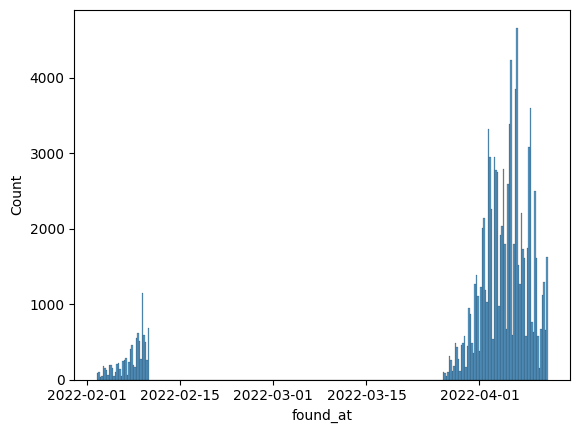

In [48]:
sns.histplot(data=tickets, x="found_at")

<Axes: xlabel='search_date', ylabel='Count'>

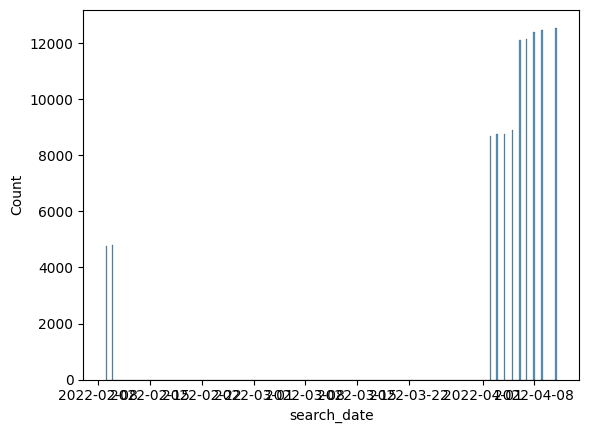

In [49]:
sns.histplot(data=tickets, x="search_date")

In [50]:
(tickets["depart_date"] - tickets["found_at"]).describe()

count                        106348
mean     90 days 13:18:40.124064392
std      68 days 10:35:12.242689840
min               -1 days +06:02:18
25%         34 days 14:38:00.500000
50%                74 days 03:38:59
75%               133 days 11:52:14
max               330 days 11:01:35
dtype: object

In [51]:
tickets.drop(columns=["search_date"], inplace=True)

In [52]:
tickets = tickets[tickets["depart_date"] > tickets["found_at"]]

In [53]:
tickets

,value,origin,number_of_changes,found_at,destination,depart_date,airline
0,43270,MOW,2,2022-03-30 14:54:04,SYZ,2022-04-21,TK
1,28166,MOW,3,2022-04-02 08:08:06,SPU,2022-04-25,W6
2,24159,MOW,2,2022-04-01 09:23:26,SZF,2022-04-14,TK
3,11160,MOW,1,2022-04-02 12:09:50,ABA,2022-04-12,S7
4,19920,MOW,1,2022-04-02 12:44:34,CAI,2022-04-14,SU
...,...,...,...,...,...,...,...
106343,13133,MOW,1,2022-02-09 18:04:57,KHV,2022-12-09,S7
106344,23341,MOW,1,2022-02-08 07:48:22,HKG,2022-12-28,TK
106345,44964,MOW,3,2022-02-04 19:42:10,PQC,2022-12-28,QR
106346,5830,MOW,0,2022-02-09 12:16:58,EVN,2022-12-06,S7


In [54]:
tickets["found_at_quarter"] = tickets["found_at"].dt.quarter
tickets["found_at_month"] = tickets["found_at"].dt.month
tickets["found_at_day"] = tickets["found_at"].dt.day
tickets["found_at_weekday"] = tickets["found_at"].dt.weekday
tickets["found_at_hour"] = tickets["found_at"].dt.hour

In [55]:
tickets["depart_date_quarter"] = tickets["depart_date"].dt.quarter
tickets["depart_date_month"] = tickets["depart_date"].dt.month
tickets["depart_date_day"] = tickets["depart_date"].dt.day
tickets["depart_date_weekday"] = tickets["depart_date"].dt.weekday
tickets["depart_date_hour"] = tickets["depart_date"].dt.hour

<Axes: xlabel='found_at_weekday', ylabel='Count'>

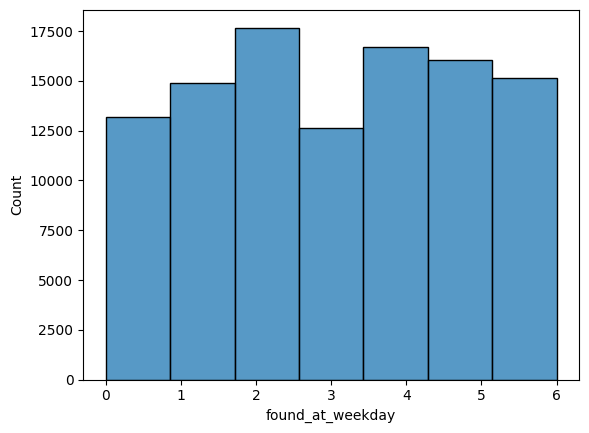

In [56]:
sns.histplot(data=tickets, x="found_at_weekday", bins=7)

<Axes: xlabel='found_at_day', ylabel='Count'>

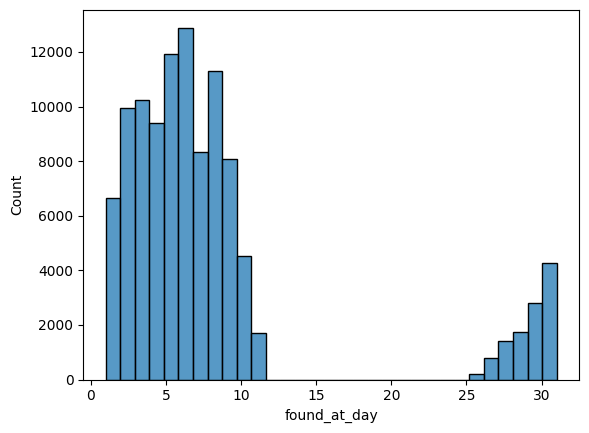

In [57]:
sns.histplot(data=tickets, x="found_at_day", bins=31)

In [58]:
tickets["depart_date_quarter"].describe()

count    106190.000000
mean          2.539354
std           0.718302
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: depart_date_quarter, dtype: float64

<Axes: xlabel='depart_date_quarter', ylabel='Count'>

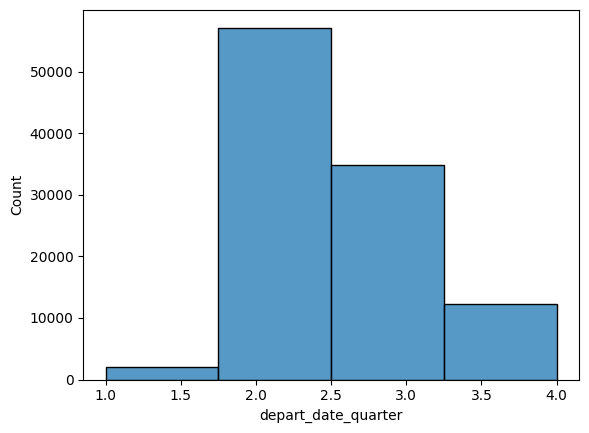

In [59]:
sns.histplot(data=tickets, x="depart_date_quarter", bins=4)

<Axes: xlabel='found_at_quarter', ylabel='Count'>

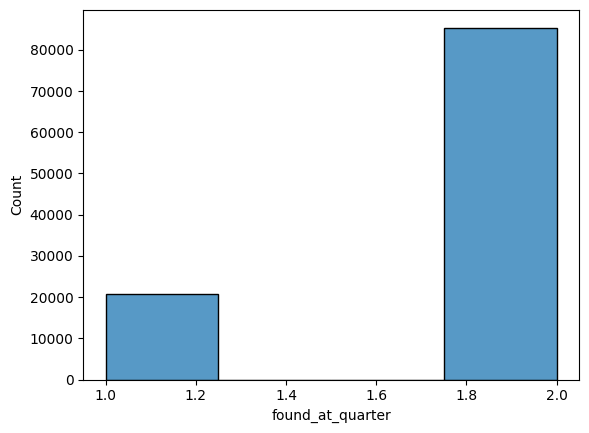

In [60]:
sns.histplot(data=tickets, x="found_at_quarter", bins=4)

<Axes: xlabel='found_at_month', ylabel='Count'>

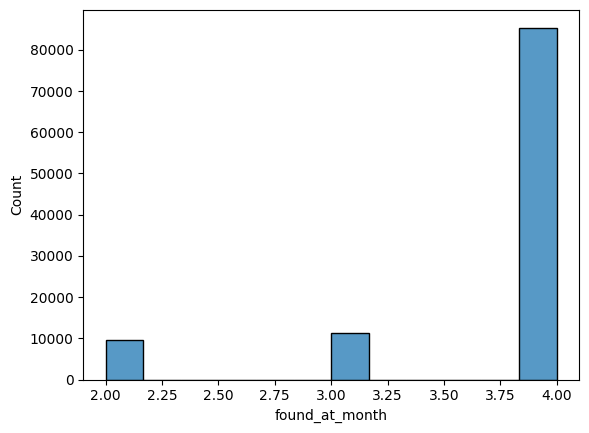

In [61]:
sns.histplot(data=tickets, x="found_at_month", bins=12)

<Axes: xlabel='depart_date_month', ylabel='Count'>

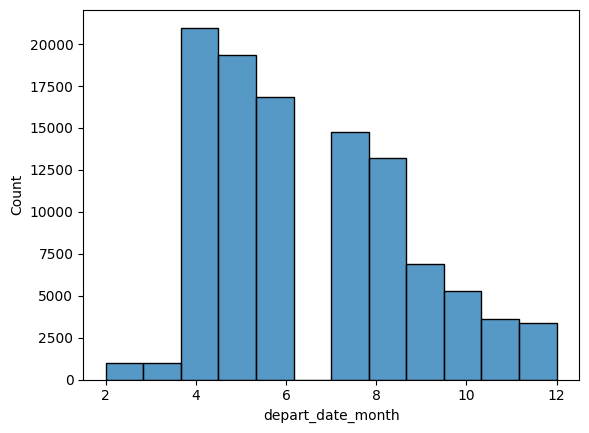

In [62]:
sns.histplot(data=tickets, x="depart_date_month", bins=12)

In [63]:
tickets["diff_days"] = (tickets["depart_date"] - tickets["found_at"]).dt.days

<Axes: xlabel='diff_days', ylabel='Count'>

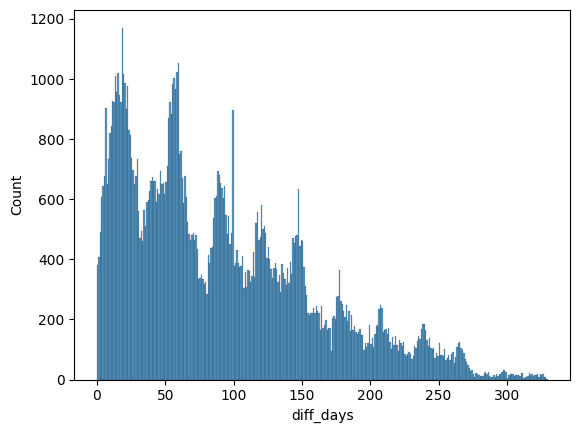

In [64]:
sns.histplot(data=tickets, x="diff_days", binwidth=1)

In [65]:
tickets

,value,origin,number_of_changes,found_at,destination,depart_date,airline,found_at_quarter,found_at_month,found_at_day,found_at_weekday,found_at_hour,depart_date_quarter,depart_date_month,depart_date_day,depart_date_weekday,depart_date_hour,diff_days
0,43270,MOW,2,2022-03-30 14:54:04,SYZ,2022-04-21,TK,1,3,30,2,14,2,4,21,3,0,21
1,28166,MOW,3,2022-04-02 08:08:06,SPU,2022-04-25,W6,2,4,2,5,8,2,4,25,0,0,22
2,24159,MOW,2,2022-04-01 09:23:26,SZF,2022-04-14,TK,2,4,1,4,9,2,4,14,3,0,12
3,11160,MOW,1,2022-04-02 12:09:50,ABA,2022-04-12,S7,2,4,2,5,12,2,4,12,1,0,9
4,19920,MOW,1,2022-04-02 12:44:34,CAI,2022-04-14,SU,2,4,2,5,12,2,4,14,3,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106343,13133,MOW,1,2022-02-09 18:04:57,KHV,2022-12-09,S7,1,2,9,2,18,4,12,9,4,0,302
106344,23341,MOW,1,2022-02-08 07:48:22,HKG,2022-12-28,TK,1,2,8,1,7,4,12,28,2,0,322
106345,44964,MOW,3,2022-02-04 19:42:10,PQC,2022-12-28,QR,1,2,4,4,19,4,12,28,2,0,326
106346,5830,MOW,0,2022-02-09 12:16:58,EVN,2022-12-06,S7,1,2,9,2,12,4,12,6,1,0,299


In [66]:
from sklearn import preprocessing

In [67]:
standart_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()

<Axes: xlabel='value', ylabel='Density'>

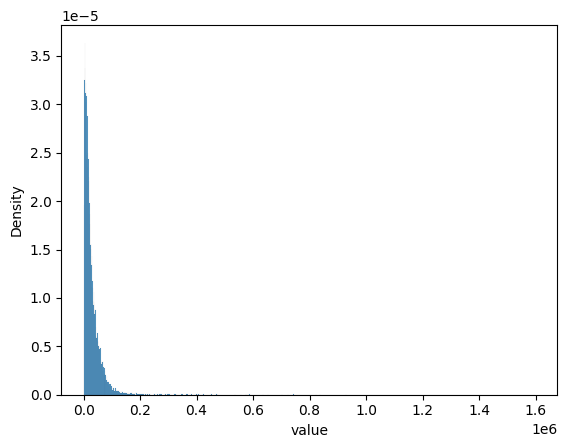

In [69]:
sns.histplot(data=tickets, x="value", stat="density")

<Axes: xlabel='number_of_changes', ylabel='Density'>

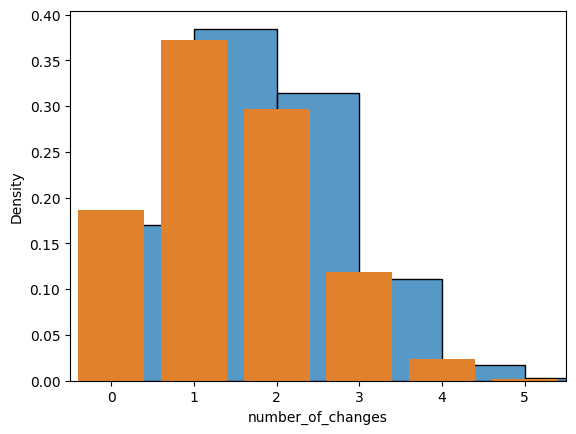

In [94]:
ax = plt.subplot()
sns.histplot(ax=ax, data=tickets, x="number_of_changes", stat="density", binwidth=1)
x = np.arange(6)
sns.barplot(x=x, y=dist.pmf(x))

In [81]:
from scipy import stats

In [82]:
dist = stats.binom(n=5, p=tickets["number_of_changes"].mean() / 5)

np.float64(0.37202024741578593)

In [80]:
tickets["number_of_changes"].mean(), tickets["number_of_changes"].std(ddof=0)

(np.float64(1.4276014690648837), np.float64(0.9719432591335497))

In [77]:
p = tickets["number_of_changes"].mean() / 5

In [78]:
5 * p * (1 - p)

np.float64(1.0199922781696407)

In [ ]:
categorical_features = ["origin", "destination", "airline"]
numerical_features = ["value", "number_of_changes", "airline"]

In [70]:
tickets

,value,origin,number_of_changes,found_at,destination,depart_date,airline,found_at_quarter,found_at_month,found_at_day,found_at_weekday,found_at_hour,depart_date_quarter,depart_date_month,depart_date_day,depart_date_weekday,depart_date_hour,diff_days
0,43270,MOW,2,2022-03-30 14:54:04,SYZ,2022-04-21,TK,1,3,30,2,14,2,4,21,3,0,21
1,28166,MOW,3,2022-04-02 08:08:06,SPU,2022-04-25,W6,2,4,2,5,8,2,4,25,0,0,22
2,24159,MOW,2,2022-04-01 09:23:26,SZF,2022-04-14,TK,2,4,1,4,9,2,4,14,3,0,12
3,11160,MOW,1,2022-04-02 12:09:50,ABA,2022-04-12,S7,2,4,2,5,12,2,4,12,1,0,9
4,19920,MOW,1,2022-04-02 12:44:34,CAI,2022-04-14,SU,2,4,2,5,12,2,4,14,3,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106343,13133,MOW,1,2022-02-09 18:04:57,KHV,2022-12-09,S7,1,2,9,2,18,4,12,9,4,0,302
106344,23341,MOW,1,2022-02-08 07:48:22,HKG,2022-12-28,TK,1,2,8,1,7,4,12,28,2,0,322
106345,44964,MOW,3,2022-02-04 19:42:10,PQC,2022-12-28,QR,1,2,4,4,19,4,12,28,2,0,326
106346,5830,MOW,0,2022-02-09 12:16:58,EVN,2022-12-06,S7,1,2,9,2,12,4,12,6,1,0,299
